# Problem 1: Design a Model

An interesting real-world system to model would be the transmission of a virus within a community. There are multiple human agents in this hypothetical system who interact with each other by spreading and perpetuating a disease.

The scale at which to model would be a community such as a city and our components are humans, who can be carriers or not of a given virus. This level is preferred since it allows us to have a granular level of attention and still draw significant insights. A larger scale, such as a country, would over-complicate spatial relations. A smaller scale, such as a neighborhood, would be easier to model but analyzing the relationships that arise wouldn't be as relevant (for enacting policy changes for example).

The states humans can take are discrete. Those are infected, recovered, susceptible and immune. Infected would a carrier of the virus, recovered someone who previously had the virus and recovered, susceptible is someone who might be infected, and immune is someone who is recovered and can no longer have the virus. Lastly, there is the dead state, which are people who either died of natural cause or from the virus.

Some of the parameters that we want to consider that directly affect those states are the degree of transmission (that is how likely it is for someone to get infected), duration of disease (how long it takes for a person to either die or recover), the recovery rate (how likely to move from infected to recovered), the immunity rate (how likely to become immune after recovered), turnover rate (so how many people die naturally and how many reproduce), average lifespan (how long for people to die of natural causes). Also, we would also want to account for the migration rate, that is how many people are entering/leaving the city. This is different from turnover rate since we want to account for people actually migrating in and out of the city. The last parameter that we would include is the population density (how many people we initialize into the model and how many of them are infected).

Components move around randomly through the space and interact with each other by proximity. Infected individuals can contaminate susceptible according to the transmission rate, which dicates how much contact is needed for infection, which can be either deterministic or probabilistic.

The macroscopic behaviors that we are interested in analyzing relate to how well the virus can thrive given the parameters we have. We would expect for example that the first time steps would always lead to an initial outbreak since there are no immune people, so we have to wait for infected to either die or create immunity. Furthermore, we would be particularly interested in exploring when herd immunity occurs (when most of the population becomes immune). Viruses whose parameters are set to high infection rate might actually achieve this faster since the potential number of susceptible hosts quickly becomes limited.

# Problem 2: Is the random module random?

To check if the random module generates values with the same properties as truly random numbers, we start off by plotting a histogram for the number of times each value appears:

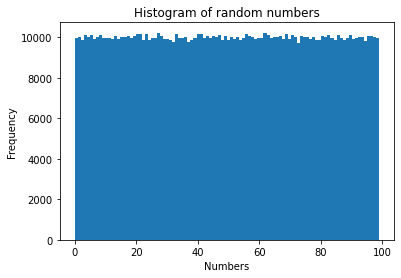

In [1]:
import numpy as np
import matplotlib.pyplot as plt

numbers = np.random.randint(100, size=1000000)

plt.figure()
plt.hist(numbers, 100)
plt.title('Histogram of random numbers')
plt.ylabel('Frequency')
plt.xlabel('Numbers')
plt.show()

We see that each value appears roughly 10000 times, which is the same as the expected frequency (sample 1000000 integers / 100 possible numbers). Next, we can plot a distribution of how often each value is actually drawn.

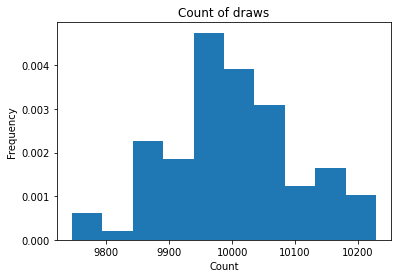

Mean: 10000.0
Std: 100.03019544117666


In [2]:
uniques = np.unique(numbers, return_counts = True)

plt.figure()
plt.hist(uniques[1], density= True)
plt.title("Count of draws")
plt.ylabel("Frequency")
plt.xlabel("Count")
plt.show()

print('Mean:',np.mean(uniques[1]))
print('Std:',np.std(uniques[1]))

Our values range from 9700 to 10200 and the mean of how often each value appears is around 10000, which coincides with our findings from the previous histogram. According to the Central Limit Theorem, if we take random samples from the population then the distribution will approximately normally distributed, which seems to hold true in this case. As such, the random module indeed seems to be sufficiently "random".

# Problem 3: Forest fire mean-field approximation

$∆\rho_e = \rho_f − p\rho_e $

The first equation refers to the change in mean density of empty sites. We arrive at this equation from the intuition that all burning trees become empty sites ($\rho_f$), which is simply the density of trees on fire, and then substract from the proportion of empty sites becoming trees ($p\rho_e $), which is the density of empty sites times the probability of turning into a tree.

<br>

$ ∆\rho_t = p\rho_e - \rho_t(1-g)(f + (1-f)(1 - (1-\rho_f)^{2d}))$

The second equation refers to the change in mean density of trees. For that, we have to find the trees that arise out of empty spaces and substract from the trees that get burned.

The first term corresponds to trees arising out of empty spaces, where we multiply the probability of empty -> tree and the density of empty spaces ($p\rho_e$)

For the second term, there are two ways of catching on fire: P(fire | no neighboor burning) = $\rho_t (1-g) f (1 - \rho_f)^{2d}$ and P(fire | neighboors burning) =  $\rho_t (1-g) (1 - (1 - \rho_f)^{2d})$. We arrive at this since the probability of one cell being on fire is $\rho_f$, so the probability of not being on fire is the complement of that. Because we also have to acccount for all the neighbors in the dimension we add an exponent of 2d, leading us to the expression $(1 - \rho_f)^{2d}$ which corresponds to probability of neighbors around a cell not being on fire. This is a common expression to both ways of catching fire, which we have to add together, leading us to $\rho_t (1-g) f (1 - \rho_f)^{2d} + \rho_t (1-g) (1 - (1 - \rho_f)^{2d}) = \rho_t(1-g)(f + (1-f)(1 - (1-\rho_f)^{2d})$.

Now that we have both terms defined, we substract the density of trees that arise from the density of trees that get burned, leading us to the second equation.

<br>

$△\rho_f = - \rho_f + \rho_t(1-g) (f + (1 - f) (1 - \rho_f)^{2d}))$

The third equation refers to the change in mean density of trees on fire. We already have the expresion for trees catching on fire from the previous equation, which is $\rho_t(1-g)(f + (1-f)(1 - (1-\rho_f)^{2d})$.

Because at each time step all of the trees that were on fire die out, we substract the proportion of trees that were on fire on the previous step, which is $\rho_f$. Once we do that, we arrive at the third equation.

# Problem 4: Wireworld

The code for this question was inspired from the following sources:

https://github.com/Farbfetzen/Wireworld

https://github.com/yackx/wireworld

In [3]:
import random as rd
from PIL import Image
from matplotlib import colors
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
import time as tm
from matplotlib import rc
import tempfile; tempfile.tempdir='./'
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

In [4]:
initial = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
    [0,0,0,3,3,2,1,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,3,0,0,0,0,0,0,0,0,2,1,3,3,3,3,0,0,0,0,0,0,0],
    [0,0,0,3,3,3,3,3,3,3,1,0,0,0,0,0,0,3,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,3,3,3,3],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,0,0,0,0],
    [0,0,0,3,3,2,1,3,3,3,3,0,0,0,0,0,0,2,0,0,0,0,0,0],
    [0,0,3,0,0,0,0,0,0,0,0,3,3,3,3,3,3,0,0,0,0,0,0,0],
    [0,0,0,3,1,2,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],  
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])



In [5]:
class Wireworld:
    '''
    We use this class to contain the Wireworld simulation
    and its attributes
    '''
    def __init__(self, cells):
        self.height = 13
        self.width = 24
        self.current_state = cells
        
    def __rules(self, row, col):
        '''
        Defines the transition rules from one state to
        the other
        '''
        bg = 0
        head = 1
        tail = 2
        wire = 3
        
        if self.current_state[row][col] == bg:
            return bg
        elif self.current_state[row][col] == head:
            return tail
        elif self.current_state[row][col] == tail:
            return wire
        
        elif self.current_state[row][col] == wire:
            count_heads = 0
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    if row + dx < 0 or row + dx >= self.height:
                        continue
                    if col + dy < 0 or col + dy >= self.width:
                        continue
                    if self.current_state[row + dx][col + dy] == 1:
                        count_heads += 1
            if count_heads == 1:
                return 1
            if count_heads == 2:
                return 1
            return 3            
    
    def next_step(self):
        '''
        Updates the simulation to the next step using
        the rules above
        '''
        next_state = np.zeros((self.height, self.width), int)
        for x in range(self.height):
            for y in range(self.width):
                next_state[x][y] = self.__rules(x, y)
        self.current_state = next_state
    
    def show(self):
        '''
        Creates an example visualization
        '''
        plt.grid()
        plt.imshow(self.current_state)        

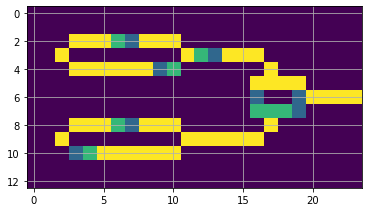

In [6]:
# Print out example to check if the model is working
sim = Wireworld(initial)
sim.next_step()
sim.show()

MovieWriter imagemagick unavailable; using Pillow instead.


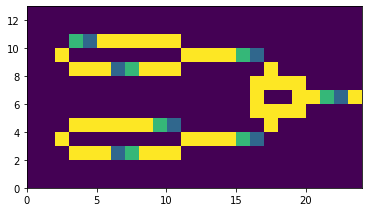

In [8]:
def animate(n, setup):
    '''
    We use this function to properly run the animation
    Reference: https://towardsdatascience.com/the-simplest-way-of-making-gifs-and-math-videos-with-python-aec41da74c6e
    
    '''
    fig = plt.figure()
    camera = Camera(fig)
    
    sim = Wireworld(setup)
    
    for _ in range(n):
        sim.next_step()
        plt.grid()
        plt.imshow(sim.current_state, extent = [0, sim.width, 0, sim.height], animated = True)
        camera.snap()

    anim = camera.animate()
    fname = tempfile.mktemp('.gif')
    anim.save(fname, writer = 'imagemagick')
    tm.sleep(0.1)
    
    display(HTML("""
            <image style="width:200" src="{}" >
                """.format(fname)))

animate(100, initial)